In [1]:
### importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
### importing dataset
data = pd.read_csv('/content/drive/MyDrive/Deep Learning/Predict the movement of a person/go_track_trackspoints.csv',parse_dates=['time'])
data.head()

id   latitude  longitude  track_id                time
0   1 -10.939341 -37.062742         1 2014-09-13 07:24:32
1   2 -10.939341 -37.062742         1 2014-09-13 07:24:37
2   3 -10.939324 -37.062765         1 2014-09-13 07:24:42
3   4 -10.939211 -37.062843         1 2014-09-13 07:24:47
4   5 -10.938939 -37.062879         1 2014-09-13 07:24:53

In [5]:
### fixing the range for simplicity
data = data[data.latitude>-20]

In [6]:
### checking the information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17989 entries, 0 to 18106
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         17989 non-null  int64         
 1   latitude   17989 non-null  float64       
 2   longitude  17989 non-null  float64       
 3   track_id   17989 non-null  int64         
 4   time       17989 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 843.2 KB


In [7]:
### checking for null values
data.isna().sum()

id           0
latitude     0
longitude    0
track_id     0
time         0
dtype: int64

In [8]:
### fixing the range for visualization
data1 = data[data.latitude.between(-10.924259,-10.900281,inclusive=True)]
data1 = data1[data1.longitude.between(-37.107572,-37.049679,inclusive=True)]

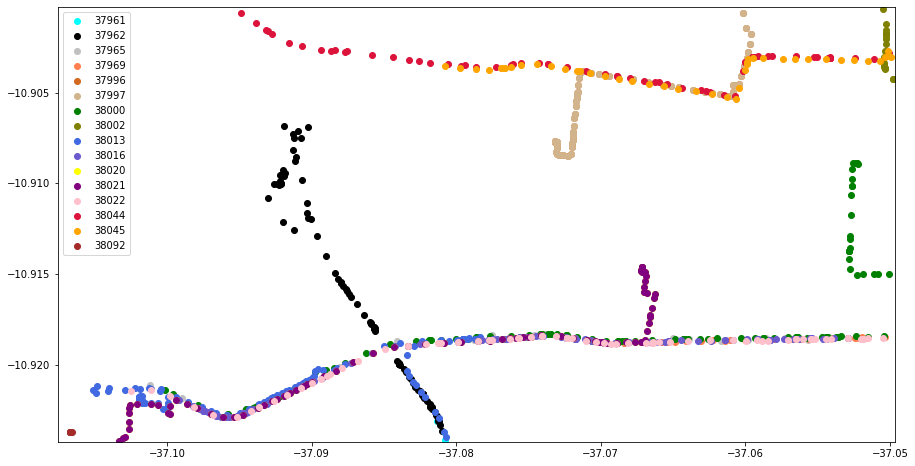

In [14]:
plt.figure(figsize=(15,8))

c = 0
colors = ['aqua','black','silver','coral','chocolate','tan','green','olive','royalblue','slateblue','yellow',
          'purple','pink','crimson','orange','brown']
for i in pd.unique(data1.track_id)[-16:]:
    plt.scatter(data1.longitude[data1.track_id==i],data1.latitude[data1.track_id==i],color=colors[c],label=i)
    c+=1
plt.ylim(-10.924259,-10.900281)
plt.xlim(-37.107572,-37.049679)
plt.legend()

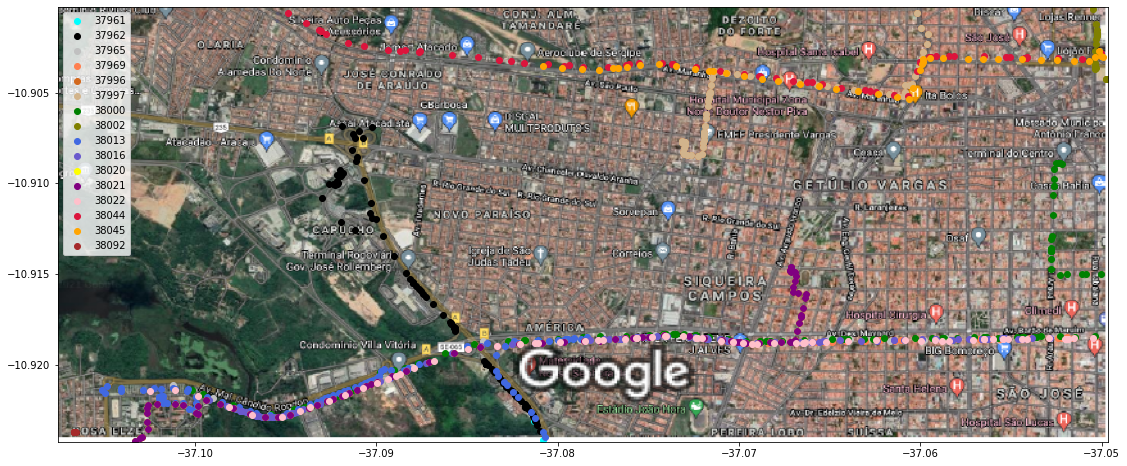

In [13]:
### plotting points on image
plt.figure(figsize=(20,8))
img = plt.imread('/content/drive/MyDrive/Deep Learning/Predict the movement of a person/map1.png')
plt.imshow(img,extent=[-37.107572,-37.049679,-10.924259,-10.900281,])
c = 0
colors = ['aqua','black','silver','coral','chocolate','tan','green','olive','royalblue','slateblue','yellow',
          'purple','pink','crimson','orange','brown']
for i in pd.unique(data1.track_id)[-16:]:
    plt.scatter(data1.longitude[data1.track_id==i],data1.latitude[data1.track_id==i],color=colors[c],label=i)
    c+=1
plt.ylim(-10.924259,-10.900281)
plt.xlim(-37.107572,-37.049679)
plt.legend()
plt.show()

In [20]:
### merging the latitude and longitude
x = []
from tqdm import tqdm
for i in tqdm(data1.index):
    x.append([data1.latitude[i],data1.longitude[i]])

data1['location'] = x

100%|██████████| 5035/5035 [00:00<00:00, 41475.48it/s]


In [21]:
### checking head of the updated data
data1.head()

id   latitude  ...                time                      location
217  218 -10.908888  ... 2014-09-17 05:11:51  [-10.90888783, -37.04970444]
218  219 -10.908897  ... 2014-09-17 05:12:02  [-10.90889749, -37.04971122]
219  220 -10.908897  ... 2014-09-17 05:12:12  [-10.90889728, -37.04971129]
220  221 -10.908896  ... 2014-09-17 05:12:23  [-10.90889585, -37.04971152]
221  222 -10.908894  ... 2014-09-17 05:12:34  [-10.90889388, -37.04971141]

[5 rows x 6 columns]

In [22]:
### printing the unique track id
print(pd.unique(data1.track_id))
len(pd.unique(data1.track_id))

[    3     4    11    12    13    16    17    18    19    20    21    22
    24    25    26    27    28    33    35    36    37    38    39    40
    41    43    44    45    46    47    48    49    50    58   131   132
   133   136   137   142   143   150   151   153   208 37953 37954 37955
 37957 37960 37961 37962 37965 37969 37996 37997 38000 38002 38013 38016
 38020 38021 38022 38044 38045 38092]


66

In [26]:
### creating dataframe based on the track_id
a = pd.DataFrame(columns=['id','merged','length'])
a.id = pd.unique(data1.track_id)
a.set_index('id',inplace=True)

In [27]:
### updating the above created dataframe
z = []
for i in tqdm(pd.unique(data1.track_id)):
    a['merged'][i] = list(data1.location[data1.track_id==i])
    a['length'][i] = len(list(data1.location[data1.track_id==i]))

100%|██████████| 66/66 [00:00<00:00, 963.78it/s]


In [28]:
### Again the length for simplicity
a = a[a.length>21]
a.shape

(56, 2)

In [29]:
a.head()

merged length
id                                                          
4   [[-10.90889296, -37.05237154], [-10.90904785, ...    129
11  [[-10.9045158, -37.0607683], [-10.9048774, -37...    108
13  [[-10.90885896, -37.05223934], [-10.90887542, ...    158
16  [[-10.91084681, -37.07166612], [-10.91084827, ...     69
17  [[-10.90076842, -37.05639709], [-10.90127605, ...    120

In [119]:
### creating the input and output variables
x=[];y=[]
for i in a.index:
  k = a.merged[i][0:21]
  x.append(k[0])
  y.append(k[1:])

In [120]:
X = np.array(x);Y=np.array(y)

In [121]:
## importing the libraries to train LSTM model
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Reshape
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [122]:
## padding the input and output values
#X = pad_sequences(X,maxlen=20,dtype='float',value=0.00000)
#Y = pad_sequences(Y,maxlen=20,dtype='float',value=0.00000)

In [123]:
### printing the shape of the input and output
print(X.shape,Y.shape)

(56, 2) (56, 20, 2)


In [126]:
## initializing the LSTM model
model = Sequential()
model.add(LSTM(256, activation='relu', input_shape=(None, 2)))
model.add(Dense(20*2))
model.add(Reshape((20,2)))
model.compile(optimizer='adam', loss='mse')

history = model.fit(X.reshape(56,1,2), Y, epochs=1000, validation_split=0.3, verbose=1)

Epoch 1/1000
2/2 [==============================] - 3s 627ms/step - loss: 750.3406 - val_loss: 744.2529
Epoch 2/1000
2/2 [==============================] - 0s 35ms/step - loss: 743.3633 - val_loss: 737.2003
Epoch 3/1000
2/2 [==============================] - 0s 28ms/step - loss: 736.3086 - val_loss: 729.8943
Epoch 4/1000
2/2 [==============================] - 0s 26ms/step - loss: 728.9715 - val_loss: 722.1212
Epoch 5/1000
2/2 [==============================] - 0s 26ms/step - loss: 721.1524 - val_loss: 713.6603
Epoch 6/1000
2/2 [==============================] - 0s 26ms/step - loss: 712.6713 - val_loss: 704.2830
Epoch 7/1000
2/2 [==============================] - 0s 26ms/step - loss: 703.2148 - val_loss: 693.7693
Epoch 8/1000
2/2 [==============================] - 0s 27ms/step - loss: 692.6278 - val_loss: 681.9048
Epoch 9/1000
2/2 [==============================] - 0s 36ms/step - loss: 680.6761 - val_loss: 668.4706
Epoch 10/1000
2/2 [==============================] - 0s 29ms/step - loss

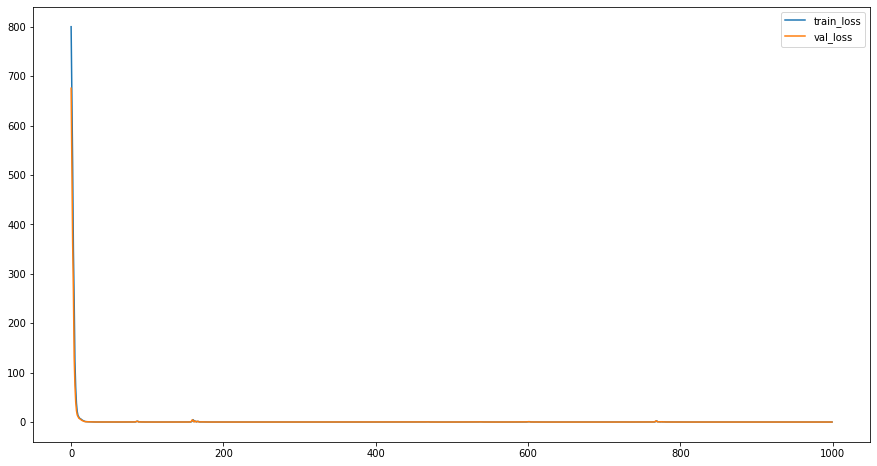

In [113]:
### plotting train and validation loss
plt.figure(figsize=(15,8))
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()

In [149]:
### predicting for input
input = X[7]
pred = model.predict(input.reshape(1,1,2))
pred

array([[[-10.9051485, -37.049614 ],
        [-10.904917 , -37.051132 ],
        [-10.904792 , -37.050972 ],
        [-10.904951 , -37.050686 ],
        [-10.905412 , -37.051334 ],
        [-10.90517  , -37.051132 ],
        [-10.905245 , -37.051167 ],
        [-10.905245 , -37.051464 ],
        [-10.905465 , -37.05141  ],
        [-10.905322 , -37.05113  ],
        [-10.906202 , -37.050514 ],
        [-10.906235 , -37.05108  ],
        [-10.905569 , -37.051373 ],
        [-10.906059 , -37.051094 ],
        [-10.906122 , -37.050438 ],
        [-10.90654  , -37.050766 ],
        [-10.90683  , -37.05079  ],
        [-10.906577 , -37.051167 ],
        [-10.906451 , -37.051273 ],
        [-10.906982 , -37.05099  ]]], dtype=float32)

In [150]:
### actual output
output = Y[7]
output

array([[-10.90140333, -37.05603333],
       [-10.90145167, -37.05601   ],
       [-10.90159833, -37.05587   ],
       [-10.90199833, -37.05556667],
       [-10.90240833, -37.05524333],
       [-10.90258667, -37.05509833],
       [-10.90261333, -37.05508   ],
       [-10.90261167, -37.05507167],
       [-10.90261167, -37.05507167],
       [-10.90261167, -37.05507167],
       [-10.90260833, -37.05503   ],
       [-10.90261167, -37.05503   ],
       [-10.90275167, -37.05494667],
       [-10.90309667, -37.05471167],
       [-10.90352167, -37.05442167],
       [-10.90395167, -37.05414167],
       [-10.904465  , -37.05377667],
       [-10.90494333, -37.05341833],
       [-10.90516667, -37.05325667],
       [-10.90521167, -37.053205  ]])

In [151]:
### latitude and longitude for input point
lat11 = input[0]
lon11 = input[1]
print(lat11,lon11)

-10.90140333 -37.05603333


In [152]:
### latitude and longitude for predicted points
lat1 = []
lon1 = []
for i in pred[0]:
  lat1.append(i[0])
  lon1.append(i[1])

In [153]:
### latitude and longitude for actual points
lat = []
lon = []
for i in output:
  print(i)
  lat.append(i[0])
  lon.append(i[1])

[-10.90140333 -37.05603333]
[-10.90145167 -37.05601   ]
[-10.90159833 -37.05587   ]
[-10.90199833 -37.05556667]
[-10.90240833 -37.05524333]
[-10.90258667 -37.05509833]
[-10.90261333 -37.05508   ]
[-10.90261167 -37.05507167]
[-10.90261167 -37.05507167]
[-10.90261167 -37.05507167]
[-10.90260833 -37.05503   ]
[-10.90261167 -37.05503   ]
[-10.90275167 -37.05494667]
[-10.90309667 -37.05471167]
[-10.90352167 -37.05442167]
[-10.90395167 -37.05414167]
[-10.904465   -37.05377667]
[-10.90494333 -37.05341833]
[-10.90516667 -37.05325667]
[-10.90521167 -37.053205  ]


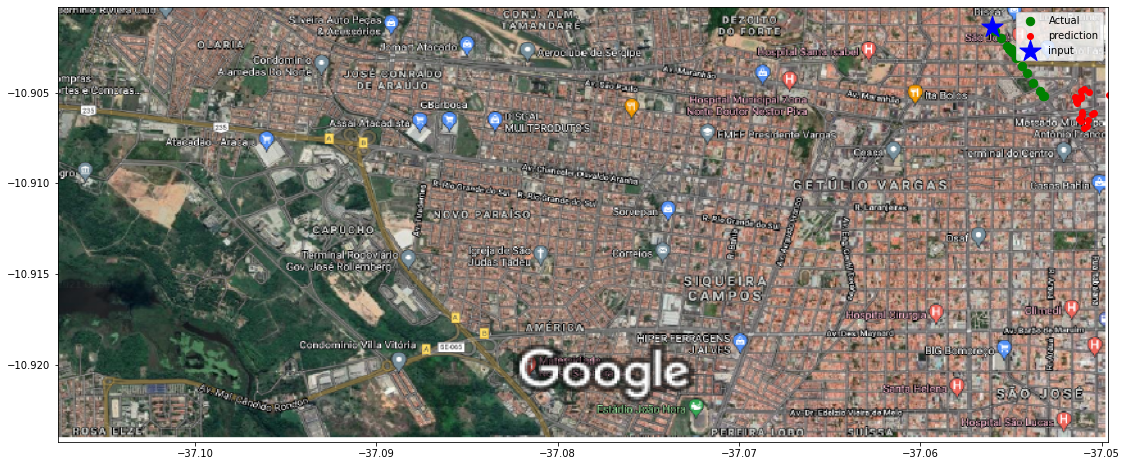

In [154]:
plt.figure(figsize=(20,8))
plt.imshow(img,extent=[-37.107572,-37.049679,-10.924259,-10.900281,])
plt.scatter(lon,lat,label='Actual',color='green',s=70)
plt.scatter(lon1,lat1,label='prediction',color='red')
plt.scatter(lon11,lat11,color='blue',marker='*',s=500,label='input')
plt.ylim(-10.924259,-10.900281)
plt.xlim(-37.107572,-37.049679)
plt.legend()
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Deep Learning/Predict the movement of a person/my_model.h5')

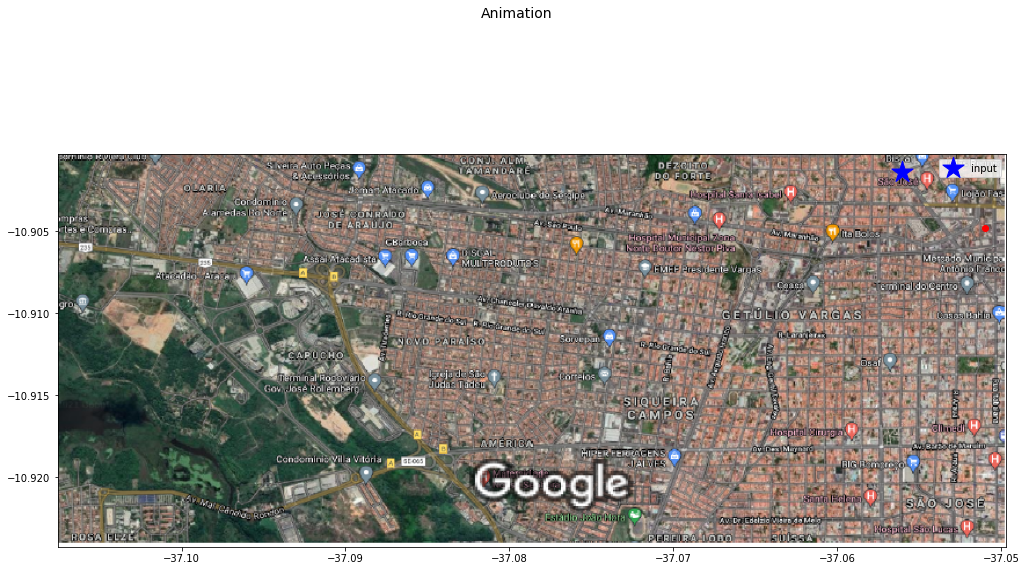

In [167]:
from random import randint
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

# create empty lists for the x and y data
x = []
y = []

# create the figure and axes objects
fig, ax = plt.subplots(figsize=(17,10))


### Defining Animate function
def animate(i):    
    ax.clear()
    ax.imshow(img,extent=[-37.107572,-37.049679,-10.924259,-10.900281,])
    ax.scatter(lon11,lat11,color='blue',marker='*',s=500,label='input')
    ax.scatter(pred[0][i][1],pred[0][i][0],color='red')
    ax.ylim(-10.924259,-10.900281)
    ax.xlim(-37.107572,-37.049679)
    ax.legend()

ani = FuncAnimation(fig, animate, frames=10, interval=10, repeat=False)

fig.suptitle('Animation', fontsize=14)

ani.save('/content/drive/MyDrive/Deep Learning/Predict the movement of a person/video.gif',writer='pillow',fps=30)


plt.show()

In [178]:
model.save('/content/drive/MyDrive/Deep Learning/Predict the movement of a person/my_model.h5')